## Fichier dédié à l'établissement du modèle de régression linéaire

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from scipy.stats import pearsonr
import qsar_utils as qu

### Chargement des données

In [3]:
df_norm = pd.read_csv("data/qsar_fish_toxicity_norm.csv")
df_raw = pd.read_csv("data/qsar_fish_toxicity.csv")
df_LC50 = df_norm["LC50"]
df_norm = df_norm.drop(columns = "LC50")
df_raw = df_raw.drop(columns="LC50")

### Etablissement du Leave-one-out pour l'entrainement sur le modèle Linéaire

In [ ]:
def LOO_LC50(df : pd.DataFrame, df_LC50 : pd.DataFrame) -> tuple[list[float], float]:
    """
    Cette fonction permet d'effectuer un Leave one Out sur des données pandas et de l'appliquer à un modèle Linéaire pour
    prédire la valeur de la LC50 d'une molécule
    df : tableau pandas avec les données
    df_LC50 : tableau pandas avec les valeurs de la LC50
    """
    loo = LeaveOneOut() # initialisation du LeaveOneOut
    predicted_LC50 = list()
    model = LinearRegression()
    for train_index, test_index in loo.split(df): # parcours des index sélectionnés par le leave one out
        model.fit(df.iloc[train_index], df_LC50.iloc[train_index])
        predict = model.predict(df.iloc[test_index])
        predicted_LC50.append(predict[0])
    corr_coef, _ = pearsonr(df_LC50, predicted_LC50) # calcul du coefficients de corrélation
    slope = model.coef_
    intercept = model.intercept_
    return predicted_LC50, corr_coef, slope, intercept

In [5]:
predicted_LC50_norm, corr_norm, coef_norm, intercept_norm = LOO_LC50(df_norm, df_LC50)
predicted_LC50_raw, corr_raw, coef_raw, intercept_raw = LOO_LC50(df_raw, df_LC50)

columns = df_norm.columns  # Liste des colonnes du DataFrame
equation_norm = " + ".join([f"{coef_norm[i]:.4f} × {col}" for i, col in enumerate(columns)])
equation_markdown_norm = f"**Équation Normalisée** : $LC50 = {equation_norm} + {intercept_norm:.4f}$"
print(equation_markdown_norm)

columns_raw = df_raw.columns
equation_raw = " + ".join([f"{coef_raw[i]:.4f} × {col}" for i, col in enumerate(columns_raw)])
equation_markdown_raw = f"**Équation Brute** : $LC50 = {equation_raw} + {intercept_raw:.4f}$"
print(equation_markdown_raw)

PearsonRResult(statistic=0.7538310232486378, pvalue=1.9987729900210975e-167)
PearsonRResult(statistic=0.7538310232486377, pvalue=1.998772990021805e-167)
**Équation Normalisée** : $LC50 = 2.0291 × CIC0 + 2.7236 × SM1_Dz(Z) + -1.8884 × GATS1i + 0.4114 × NDSCH + 0.0588 × NdssC + 3.6440 × MLOGP + 1.0262$
**Équation Brute** : $LC50 = 0.3858 × CIC0 + 1.2545 × SM1_Dz(Z) + -0.7482 × GATS1i + 0.4114 × NDSCH + 0.0588 × NdssC + 0.3877 × MLOGP + 2.1833$


**Équation Normalisée** : $LC50 = 2.0291 × CIC0 + 2.7236 × SM1_Dz(Z) + -1.8884 × GATS1i + 0.4114 × NDSCH + 0.0588 × NdssC + 3.6440 × MLOGP + 1.0262$

**Équation Brute** : $LC50 = 0.3858 × CIC0 + 1.2545 × SM1_Dz(Z) + -0.7482 × GATS1i + 0.4114 × NDSCH + 0.0588 × NdssC + 0.3877 × MLOGP + 2.1833$

## Visualisation du résultat

### Droite de régression pour les données normalisées

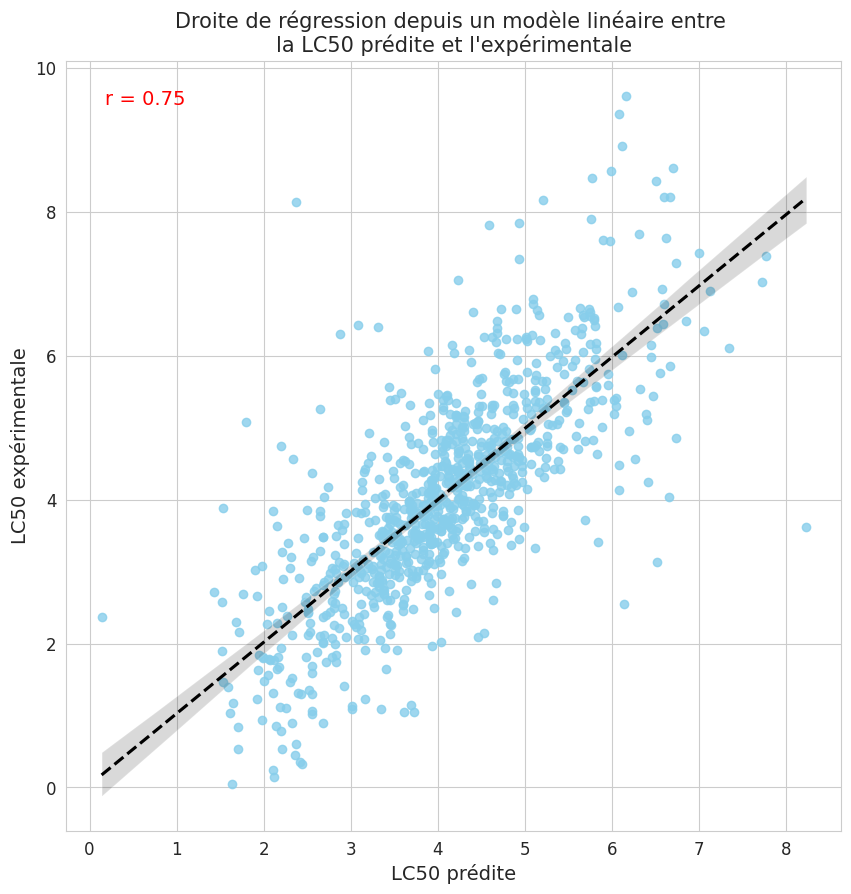

In [5]:
qu.scatter_QSAR(x_data = predicted_LC50_norm, y_data = df_LC50, corr_coef = corr_norm)

### Droite de régression pour les données brutes

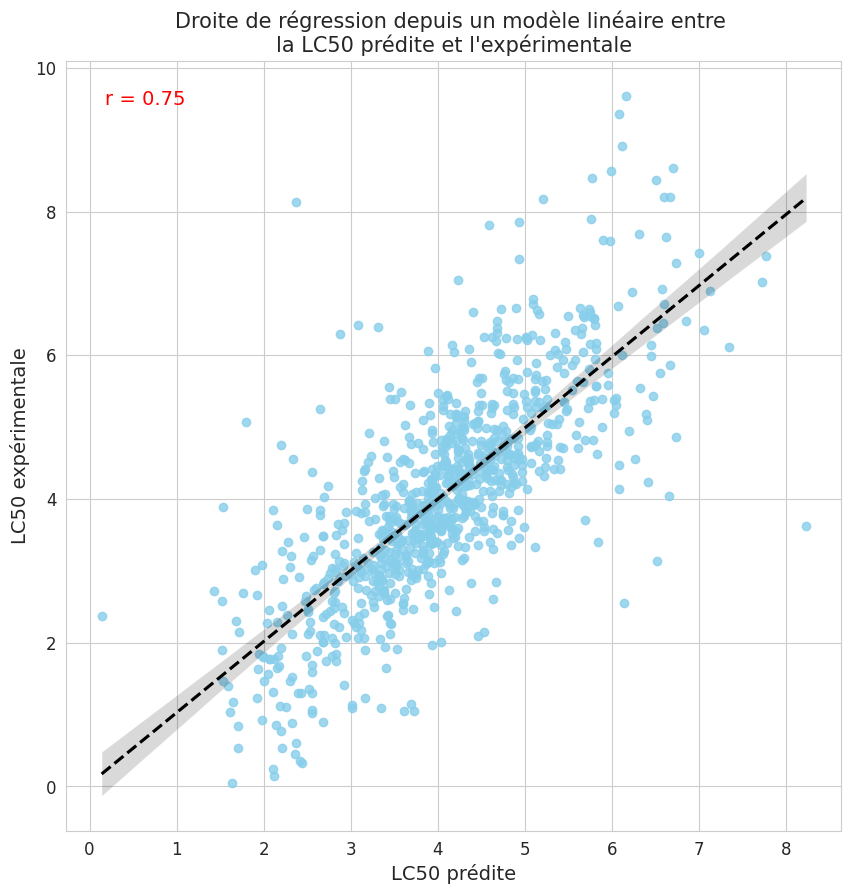

In [6]:
qu.scatter_QSAR(x_data = predicted_LC50_raw, y_data = df_LC50, corr_coef=corr_raw)

Les performances du modèle linéaire ne semblent pas impactés par la normalisation. Cela peut être dû par le fait que seulement 4 colonnes ont été normalisées (les autres sont des variables catégoriques) ou bien par la nature du modèle linéaire qui ignore la normalisation

0.7105928117722795


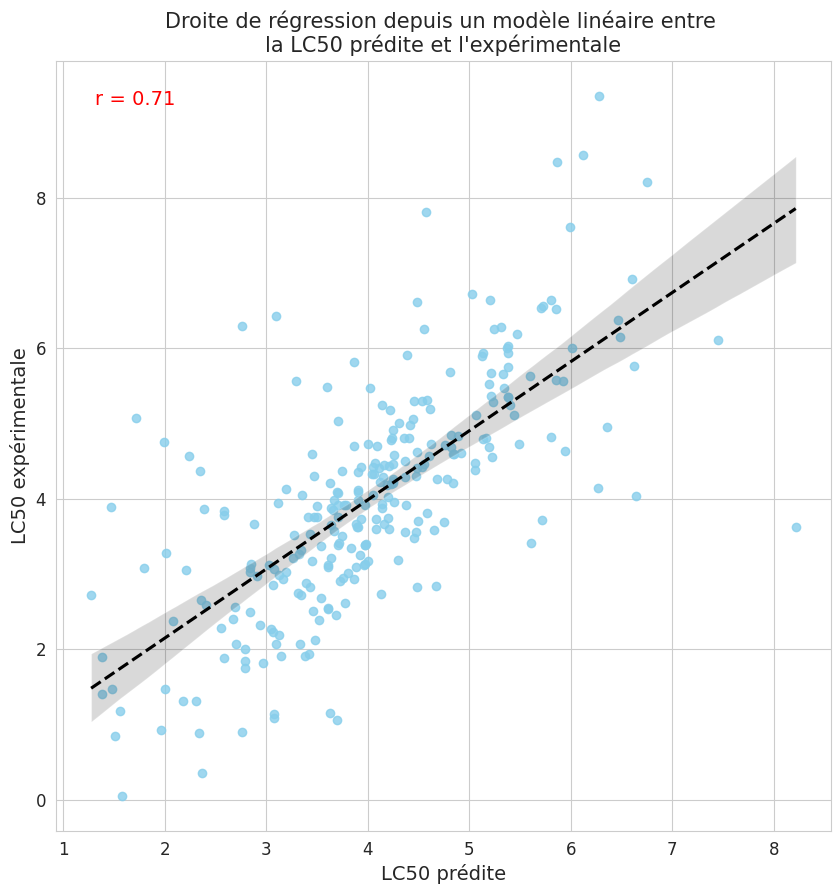

In [18]:
from sklearn.model_selection import train_test_split
df_norm = pd.read_csv("data/qsar_fish_toxicity_norm.csv")

train_data, test_data = train_test_split(df_norm, train_size=0.7)
LC50_train = train_data["LC50"]
LC50_test = test_data["LC50"]
train_data = train_data.drop(columns="LC50")
test_data = test_data.drop(columns="LC50")

model = LinearRegression()
model.fit(train_data, LC50_train)
predict = model.predict(test_data)
corr_coef, _ = pearsonr(LC50_test, predict) # calcul du coefficients de corrélation
print(corr_coef)

qu.scatter_QSAR(predict, LC50_test, corr_coef)
